# HW3 DQN, Actor Critic

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1' # 0 is default GPU

In [2]:
import tensorflow as tf

print(tf.__version__)

c:\works\venv\vhw3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\works\venv\vhw3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\works\venv\vhw3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\works\venv\vhw3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' 

1.14.0


c:\works\venv\vhw3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\works\venv\vhw3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\works\venv\vhw3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\works\venv\vhw3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: P

In [3]:
import train_ac_f18 as ac

import sys, os
import datetime as dt

from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()

print(local_device_protos)

print(tf.test.is_gpu_available())
print(tf.test.gpu_device_name())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2743047245285762161
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9116851241
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9169583655326267897
physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:68:00.0, compute capability: 7.5"
]
True
/device:GPU:0


## Run Atari DQN

To determine if your implementation of Q-learning is performing well, you should run it with the default hyperparameters on the Pong game. 

Our reference solution gets a reward of around

* -20 to -15 after 500k steps,
* -15 to -10 after 1m steps,
* -10 to -5 after 1.5m steps, and around
* +10 after 2m steps on Pong.

The maximum score of around +20 is reached after about 4-5m steps. However, there is considerable variation between runs.

In [ ]:
import run_dqn_atari

print('starts train at', dt.datetime.now())
run_dqn_atari.main()
print('finished train at', dt.datetime.now())

```
Timestep 60000
mean reward (100 episodes) -20.184615
best mean reward -inf
episodes 65
exploration 0.946000
learning_rate 0.000100
Timestep 70000
mean reward (100 episodes) -20.186667
best mean reward -inf
episodes 75
exploration 0.937000
learning_rate 0.000100
running time 1.073381

...

Timestep 500000
mean reward (100 episodes) -19.440000
best mean reward -19.420000
episodes 503
exploration 0.550000
learning_rate 0.000100
running time 1.166625
Timestep 510000
mean reward (100 episodes) -19.390000
best mean reward -19.380000
episodes 511
exploration 0.541000
learning_rate 0.000100
running time 1.153867

...

Timestep 1000000
mean reward (100 episodes) -12.380000
best mean reward -12.380000
episodes 733
exploration 0.100000
learning_rate 0.000100
running time 1.435465
Timestep 1010000
mean reward (100 episodes) -12.400000
best mean reward -12.360000
episodes 736
exploration 0.099963
learning_rate 0.000100
running time 1.399879

...

Timestep 1500000
mean reward (100 episodes) 0.390000
best mean reward 0.390000
episodes 873
exploration 0.098125
learning_rate 0.000100
running time 1.199395
Timestep 1510000
mean reward (100 episodes) 0.950000
best mean reward 0.950000
episodes 876
exploration 0.098088
learning_rate 0.000100
running time 1.194123

...

Timestep 2000000
mean reward (100 episodes) 12.620000
best mean reward 13.080000
episodes 1049
exploration 0.096250
learning_rate 0.000100
running time 1.389689
Timestep 2010000
mean reward (100 episodes) 12.540000
best mean reward 13.080000
episodes 1053
exploration 0.096213
learning_rate 0.000100
running time 1.457177

...

Timestep 3000000
mean reward (100 episodes) 13.750000
best mean reward 16.180000
episodes 1451
exploration 0.092500
learning_rate 0.000100
running time 1.466923
Timestep 3010000
mean reward (100 episodes) 13.750000
best mean reward 16.180000
episodes 1455
exploration 0.092463
learning_rate 0.000100
running time 1.471801

...

Timestep 4000000
mean reward (100 episodes) 18.390000
best mean reward 18.620000
episodes 1919
exploration 0.088750
learning_rate 0.000100
running time 1.203603
Timestep 4010000
mean reward (100 episodes) 18.400000
best mean reward 18.620000
episodes 1924
exploration 0.088712
learning_rate 0.000100
running time 1.192271

...

Timestep 5000000
mean reward (100 episodes) 17.880000
best mean reward 18.620000
episodes 2418
exploration 0.085000
learning_rate 0.000100
running time 1.559200
Timestep 5010000
mean reward (100 episodes) 17.890000
best mean reward 18.620000
episodes 2423
exploration 0.084962
learning_rate 0.000100
running time 1.562105

...

Timestep 6000000
mean reward (100 episodes) 18.760000
best mean reward 18.780000
episodes 2934
exploration 0.081250
learning_rate 0.000097
running time 1.557354
Timestep 6010000
mean reward (100 episodes) 18.770000
best mean reward 18.780000
episodes 2939
exploration 0.081213
learning_rate 0.000097
running time 1.553094

...

Timestep 7000000
mean reward (100 episodes) 16.650000
best mean reward 17.710000
episodes 3368
exploration 0.077500
learning_rate 0.000095
running time 1.633981
Timestep 7010000
mean reward (100 episodes) 16.630000
best mean reward 17.710000
episodes 3373
exploration 0.077463
learning_rate 0.000095
running time 1.606738

...
...

Timestep 8500000
mean reward (100 episodes) 18.430000
best mean reward 18.950000
episodes 4257
exploration 0.071875
learning_rate 0.000091
running time 1.193127
Timestep 8510000
mean reward (100 episodes) 18.450000
best mean reward 18.950000
episodes 4262
exploration 0.071837
learning_rate 0.000091
running time 1.186877

...

Timestep 8900000
mean reward (100 episodes) 19.080000
best mean reward 19.150000
episodes 4474
exploration 0.070375
learning_rate 0.000090
running time 1.526745
Timestep 8910000
mean reward (100 episodes) 19.110000
best mean reward 19.160000
episodes 4479
exploration 0.070337
learning_rate 0.000090
running time 1.520089

...

Timestep 15090000
mean reward (100 episodes) 19.970000
best mean reward 20.000000
episodes 7938
exploration 0.047163
learning_rate 0.000075
running time 1.308588
Timestep 15100000
mean reward (100 episodes) 19.920000
best mean reward 20.000000
episodes 7944
exploration 0.047125
learning_rate 0.000075
running time 1.306158

```

In [ ]:
import run_dqn_ram

print('starts train at', dt.datetime.now())
run_dqn_ram.main()
print('finished train at', dt.datetime.now())

```
...

Timestep 100000
mean reward (100 episodes) -20.860000
best mean reward -20.450000
episodes 359
exploration 0.190000
learning_rate 0.000100
running time 1.524441
Timestep 110000
mean reward (100 episodes) -20.880000
best mean reward -20.450000
episodes 397
exploration 0.189000
learning_rate 0.000100
running time 1.485030

...

Timestep 500000
mean reward (100 episodes) -17.560000
best mean reward -17.440000
episodes 1454
exploration 0.150000
learning_rate 0.000100
running time 1.469754
Timestep 510000
mean reward (100 episodes) -17.470000
best mean reward -17.390000
episodes 1474
exploration 0.149000
learning_rate 0.000100
running time 1.446633

...

Timestep 1000000
mean reward (100 episodes) -16.240000
best mean reward -15.630000
episodes 2413
exploration 0.100000
learning_rate 0.000100
running time 1.414057
Timestep 1010000
mean reward (100 episodes) -16.120000
best mean reward -15.630000
episodes 2430
exploration 0.099775
learning_rate 0.000100
running time 1.418591

...

Timestep 2000000
mean reward (100 episodes) -16.010000
best mean reward -14.470000
episodes 4053
exploration 0.077500
learning_rate 0.000087
running time 1.453493
Timestep 2010000
mean reward (100 episodes) -15.890000
best mean reward -14.470000
episodes 4069
exploration 0.077275
learning_rate 0.000087
running time 1.494889

...

Timestep 3000000
mean reward (100 episodes) -14.680000
best mean reward -13.940000
episodes 5573
exploration 0.055000
learning_rate 0.000075
running time 1.601025
Timestep 3010000
mean reward (100 episodes) -14.700000
best mean reward -13.940000
episodes 5588
exploration 0.054775
learning_rate 0.000075
running time 1.621803

...

Timestep 4000000
mean reward (100 episodes) -14.300000
best mean reward -13.030000
episodes 6849
exploration 0.032500
learning_rate 0.000063
running time 1.515200
Timestep 4010000
mean reward (100 episodes) -14.200000
best mean reward -13.030000
episodes 6863
exploration 0.032275
learning_rate 0.000062
running time 1.488307

...

Timestep 6000000
mean reward (100 episodes) -13.100000
best mean reward -11.420000
episodes 9253
exploration 0.010000
learning_rate 0.000050
running time 1.469463
Timestep 6010000
mean reward (100 episodes) -13.180000
best mean reward -11.420000
episodes 9264
exploration 0.010000
learning_rate 0.000050
running time 1.467864

...

```

In [ ]:
import run_dqn_lander

print('starts train at', dt.datetime.now())
run_dqn_lander.main()
print('finished train at', dt.datetime.now())

```
...

Timestep 100000
mean reward (100 episodes) -44.397832
best mean reward -43.014169
episodes 217
exploration 0.020000
learning_rate 0.001000
running time 0.703590

...

Timestep 200000
mean reward (100 episodes) 65.229676
best mean reward 82.595998
episodes 410
exploration 0.020000
learning_rate 0.001000
running time 0.414938

...

Timestep 300000
mean reward (100 episodes) 159.150631
best mean reward 185.763502
episodes 737
exploration 0.020000
learning_rate 0.001000
running time 0.453937

...

Timestep 400000
mean reward (100 episodes) 64.690741
best mean reward 189.811820
episodes 1345
exploration 0.020000
learning_rate 0.001000
running time 0.250480

...

Timestep 450000
mean reward (100 episodes) 31.953950
best mean reward 189.811820
episodes 1755
exploration 0.020000
learning_rate 0.001000
running time 0.244396

...

Timestep 500000
mean reward (100 episodes) 28.682103
best mean reward 189.811820
episodes 2177
exploration 0.020000
learning_rate 0.001000
running time 0.250264

```

## Sanity Check with CartPole

In [8]:
import plot
%matplotlib inline

data_dir = os.path.join('.', 'data')

def plot_average_return(prefixes) :
    for prefix in prefixes :
        path_list = []
        if os.path.isdir(data_dir) :
            for f in os.listdir(data_dir) :
                if f.startswith('ac_' + prefix) :
                    path_list.append('data/' + f)

        print(path_list)

        for path in path_list :
            sys.argv = [ 'plot.py', path, '--value', 'AverageReturn' ]
            print('starts plot ', sys.argv, ' at', dt.datetime.now())
            try :
                plot.main()
            except ValueError as e :
                print('error - ', e)
            print('finished plot ', sys.argv, ' at', dt.datetime.now())

        print('finished plot on all command list for \'prefix ', prefix, '\' at', dt.datetime.now())

starts train  ['train_ac_f18.py', 'CartPole-v0', '-n', '100', '-b', '1000', '-e', '3', '--exp_name', 'cp_1_1', '-ntu', '1', '-ngsptu', '1']  at 2019-08-30 17:33:35.160820
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_ac_f18.py', 'CartPole-v0', '-n', '100', '-b', '1000', '-e', '3', '--exp_name', 'cp_1_1', '-ntu', '1', '-ngsptu', '1']  at 2019-08-30 17:36:10.918205
starts train  ['train_ac_f18.py', 'CartPole-v0', '-n', '100', '-b', '1000', '-e', '3', '--exp_name', 'cp_100_1', '-ntu', '100', '-ngsptu', '1']  at 2019-08-30 17:36:10.918205
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_ac_f18.py', 'CartPole-v0', '-n', '100', '-b', '1000', '-e', '3', '--exp_name', 'cp_100_1', '-ntu', '100', '-ngsptu', '1']  at 2019-08-30 17:40:01.041980
starts train  ['train_ac_f18.py', 'CartPole-v0', '-n', '100', '-b', '1000', '-e', '3', '--exp_name', 'cp_100_10', 

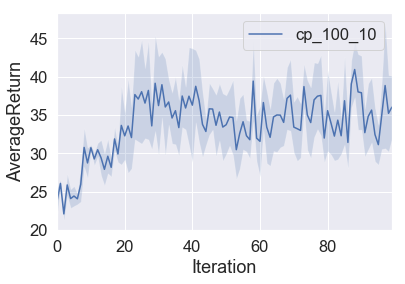

finished plot  ['plot.py', 'data/ac_cp_100_10_CartPole-v0_30-08-2019_17-40-01', '--value', 'AverageReturn']  at 2019-08-30 18:10:14.086119
starts plot  ['plot.py', 'data/ac_cp_100_1_CartPole-v0_30-08-2019_17-36-10', '--value', 'AverageReturn']  at 2019-08-30 18:10:14.086119


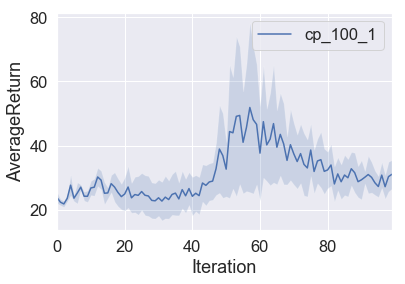

finished plot  ['plot.py', 'data/ac_cp_100_1_CartPole-v0_30-08-2019_17-36-10', '--value', 'AverageReturn']  at 2019-08-30 18:10:14.369364
starts plot  ['plot.py', 'data/ac_cp_10_100_CartPole-v0_30-08-2019_17-58-46', '--value', 'AverageReturn']  at 2019-08-30 18:10:14.370359


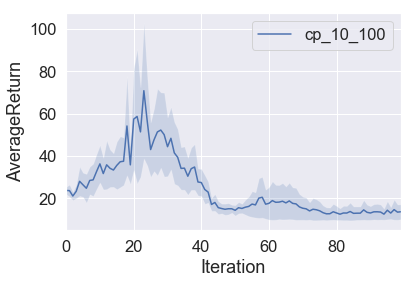

finished plot  ['plot.py', 'data/ac_cp_10_100_CartPole-v0_30-08-2019_17-58-46', '--value', 'AverageReturn']  at 2019-08-30 18:10:14.672509
starts plot  ['plot.py', 'data/ac_cp_10_10_CartPole-v0_30-08-2019_17-55-16', '--value', 'AverageReturn']  at 2019-08-30 18:10:14.674502


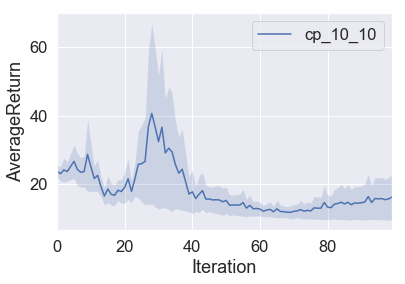

finished plot  ['plot.py', 'data/ac_cp_10_10_CartPole-v0_30-08-2019_17-55-16', '--value', 'AverageReturn']  at 2019-08-30 18:10:14.942860
starts plot  ['plot.py', 'data/ac_cp_1_100_CartPole-v0_30-08-2019_17-51-42', '--value', 'AverageReturn']  at 2019-08-30 18:10:14.943825


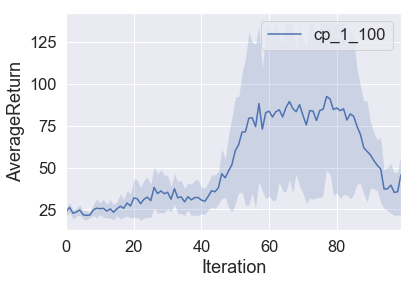

finished plot  ['plot.py', 'data/ac_cp_1_100_CartPole-v0_30-08-2019_17-51-42', '--value', 'AverageReturn']  at 2019-08-30 18:10:15.213062
starts plot  ['plot.py', 'data/ac_cp_1_1_CartPole-v0_30-08-2019_17-33-35', '--value', 'AverageReturn']  at 2019-08-30 18:10:15.213062


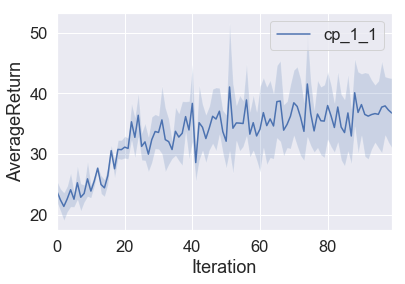

finished plot  ['plot.py', 'data/ac_cp_1_1_CartPole-v0_30-08-2019_17-33-35', '--value', 'AverageReturn']  at 2019-08-30 18:10:15.491364
finished plot on all command list for 'prefix  cp_ ' at 2019-08-30 18:10:15.491364


In [9]:
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
# path=os.environ['PATH']
# %env PATH='/usr/local/bin:'+path

command_list = [
    'python train_ac_f18.py CartPole-v0 -n 100 -b 1000 -e 3 --exp_name cp_1_1 -ntu 1 -ngsptu 1',
    'python train_ac_f18.py CartPole-v0 -n 100 -b 1000 -e 3 --exp_name cp_100_1 -ntu 100 -ngsptu 1',
    'python train_ac_f18.py CartPole-v0 -n 100 -b 1000 -e 3 --exp_name cp_100_10 -ntu 100 -ngsptu 10',
    'python train_ac_f18.py CartPole-v0 -n 100 -b 1000 -e 3 --exp_name cp_1_100 -ntu 1 -ngsptu 100',
    'python train_ac_f18.py CartPole-v0 -n 100 -b 1000 -e 3 --exp_name cp_10_10 -ntu 10 -ngsptu 10',   
    'python train_ac_f18.py CartPole-v0 -n 100 -b 1000 -e 3 --exp_name cp_10_100 -ntu 10 -ngsptu 100',   
]

for command in command_list :
    sys.argv = command.split()[1:]
    print('starts train ', sys.argv, ' at', dt.datetime.now())
    ac.main()
    print('finished train ', sys.argv, ' at', dt.datetime.now())

print('finished train on all command list at', dt.datetime.now())

plot_average_return(['cp_'])

## Actor-critic with more difficult tasks

* copy the best settings from above

starts train  ['train_ac_f18.py', 'InvertedPendulum-v2', '-ep', '1000', '--discount', '0.95', '-n', '100', '-e', '3', '-l', '2', '-s', '64', '-b', '5000', '-lr', '0.01', '--exp_name', 'ip_1_1', '-ntu', '1', '-ngsptu', '1']  at 2019-08-30 18:10:15.512264
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_ac_f18.py', 'InvertedPendulum-v2', '-ep', '1000', '--discount', '0.95', '-n', '100', '-e', '3', '-l', '2', '-s', '64', '-b', '5000', '-lr', '0.01', '--exp_name', 'ip_1_1', '-ntu', '1', '-ngsptu', '1']  at 2019-08-30 18:23:43.771188
starts train  ['train_ac_f18.py', 'InvertedPendulum-v2', '-ep', '1000', '--discount', '0.95', '-n', '100', '-e', '3', '-l', '2', '-s', '64', '-b', '5000', '-lr', '0.01', '--exp_name', 'ip_1_100', '-ntu', '1', '-ngsptu', '100']  at 2019-08-30 18:23:43.771188
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_ac_f18.py', 'Inver

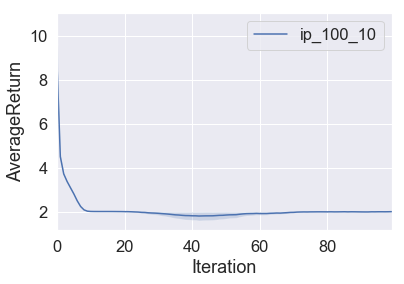

finished plot  ['plot.py', 'data/ac_ip_100_10_InvertedPendulum-v2_30-08-2019_19-37-33', '--value', 'AverageReturn']  at 2019-08-31 05:19:08.671723
starts plot  ['plot.py', 'data/ac_ip_100_1_InvertedPendulum-v2_30-08-2019_19-19-52', '--value', 'AverageReturn']  at 2019-08-31 05:19:08.671723


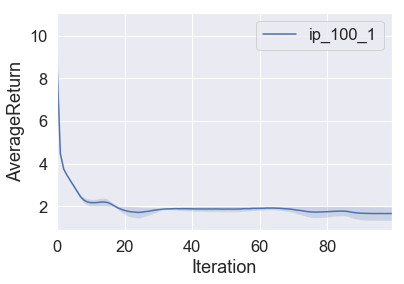

finished plot  ['plot.py', 'data/ac_ip_100_1_InvertedPendulum-v2_30-08-2019_19-19-52', '--value', 'AverageReturn']  at 2019-08-31 05:19:08.908741
starts plot  ['plot.py', 'data/ac_ip_10_100_InvertedPendulum-v2_30-08-2019_18-39-07', '--value', 'AverageReturn']  at 2019-08-31 05:19:08.908741


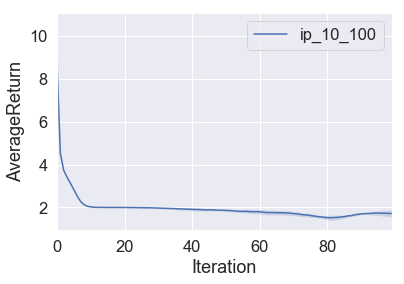

finished plot  ['plot.py', 'data/ac_ip_10_100_InvertedPendulum-v2_30-08-2019_18-39-07', '--value', 'AverageReturn']  at 2019-08-31 05:19:09.178566
starts plot  ['plot.py', 'data/ac_ip_10_10_InvertedPendulum-v2_30-08-2019_19-04-00', '--value', 'AverageReturn']  at 2019-08-31 05:19:09.178566


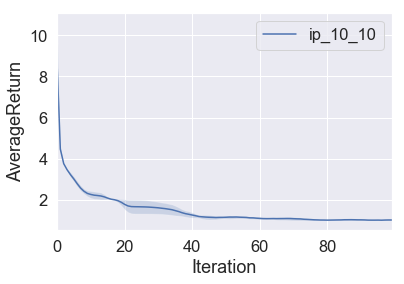

finished plot  ['plot.py', 'data/ac_ip_10_10_InvertedPendulum-v2_30-08-2019_19-04-00', '--value', 'AverageReturn']  at 2019-08-31 05:19:09.413938
starts plot  ['plot.py', 'data/ac_ip_1_100_InvertedPendulum-v2_30-08-2019_18-23-43', '--value', 'AverageReturn']  at 2019-08-31 05:19:09.413938


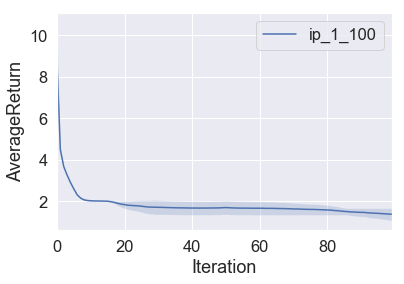

finished plot  ['plot.py', 'data/ac_ip_1_100_InvertedPendulum-v2_30-08-2019_18-23-43', '--value', 'AverageReturn']  at 2019-08-31 05:19:09.650562
starts plot  ['plot.py', 'data/ac_ip_1_1_InvertedPendulum-v2_30-08-2019_18-10-15', '--value', 'AverageReturn']  at 2019-08-31 05:19:09.650562


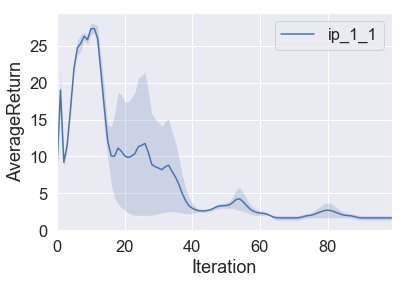

finished plot  ['plot.py', 'data/ac_ip_1_1_InvertedPendulum-v2_30-08-2019_18-10-15', '--value', 'AverageReturn']  at 2019-08-31 05:19:09.890924
finished plot on all command list for 'prefix  ip_ ' at 2019-08-31 05:19:09.890924
['data/ac_hc_100_10_HalfCheetah-v2_31-08-2019_03-25-02', 'data/ac_hc_100_1_HalfCheetah-v2_31-08-2019_01-52-23', 'data/ac_hc_10_100_HalfCheetah-v2_30-08-2019_22-44-07', 'data/ac_hc_10_10_HalfCheetah-v2_31-08-2019_00-26-02', 'data/ac_hc_1_100_HalfCheetah-v2_30-08-2019_21-23-28', 'data/ac_hc_1_1_HalfCheetah-v2_30-08-2019_20-04-10']
starts plot  ['plot.py', 'data/ac_hc_100_10_HalfCheetah-v2_31-08-2019_03-25-02', '--value', 'AverageReturn']  at 2019-08-31 05:19:09.891917


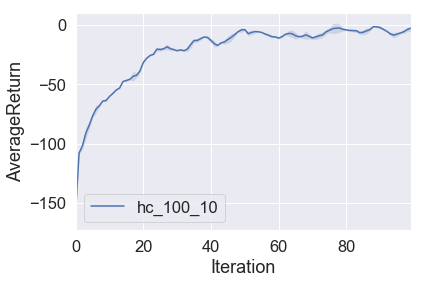

finished plot  ['plot.py', 'data/ac_hc_100_10_HalfCheetah-v2_31-08-2019_03-25-02', '--value', 'AverageReturn']  at 2019-08-31 05:19:10.129279
starts plot  ['plot.py', 'data/ac_hc_100_1_HalfCheetah-v2_31-08-2019_01-52-23', '--value', 'AverageReturn']  at 2019-08-31 05:19:10.129279


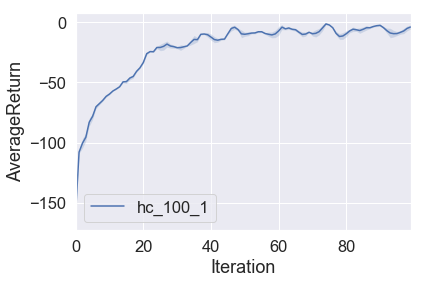

finished plot  ['plot.py', 'data/ac_hc_100_1_HalfCheetah-v2_31-08-2019_01-52-23', '--value', 'AverageReturn']  at 2019-08-31 05:19:10.366600
starts plot  ['plot.py', 'data/ac_hc_10_100_HalfCheetah-v2_30-08-2019_22-44-07', '--value', 'AverageReturn']  at 2019-08-31 05:19:10.366600


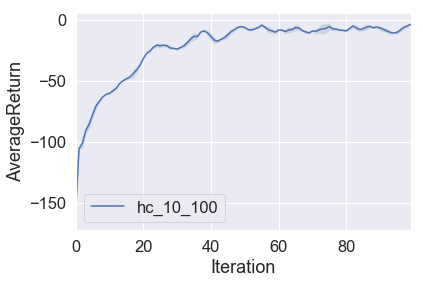

finished plot  ['plot.py', 'data/ac_hc_10_100_HalfCheetah-v2_30-08-2019_22-44-07', '--value', 'AverageReturn']  at 2019-08-31 05:19:10.602955
starts plot  ['plot.py', 'data/ac_hc_10_10_HalfCheetah-v2_31-08-2019_00-26-02', '--value', 'AverageReturn']  at 2019-08-31 05:19:10.602955


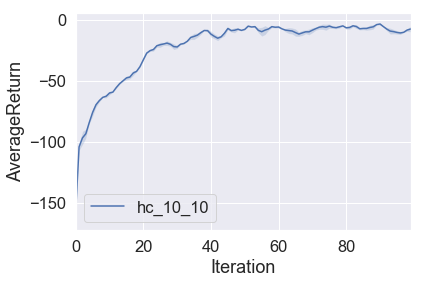

finished plot  ['plot.py', 'data/ac_hc_10_10_HalfCheetah-v2_31-08-2019_00-26-02', '--value', 'AverageReturn']  at 2019-08-31 05:19:10.841316
starts plot  ['plot.py', 'data/ac_hc_1_100_HalfCheetah-v2_30-08-2019_21-23-28', '--value', 'AverageReturn']  at 2019-08-31 05:19:10.841316


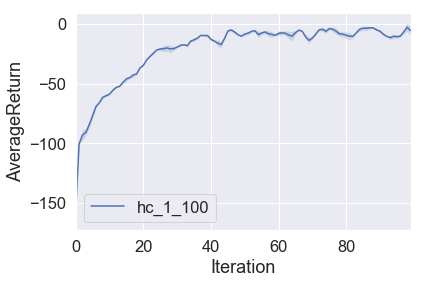

finished plot  ['plot.py', 'data/ac_hc_1_100_HalfCheetah-v2_30-08-2019_21-23-28', '--value', 'AverageReturn']  at 2019-08-31 05:19:11.081628
starts plot  ['plot.py', 'data/ac_hc_1_1_HalfCheetah-v2_30-08-2019_20-04-10', '--value', 'AverageReturn']  at 2019-08-31 05:19:11.081628


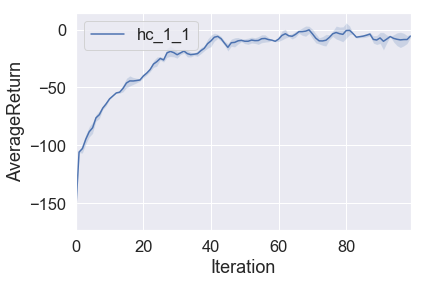

finished plot  ['plot.py', 'data/ac_hc_1_1_HalfCheetah-v2_30-08-2019_20-04-10', '--value', 'AverageReturn']  at 2019-08-31 05:19:11.318040
finished plot on all command list for 'prefix  hc_ ' at 2019-08-31 05:19:11.318040


In [10]:
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
# path=os.environ['PATH']
# %env PATH='/usr/local/bin:'+path

command_list = [
    'python train_ac_f18.py InvertedPendulum-v2 -ep 1000 --discount 0.95 -n 100 -e 3 -l 2 -s 64 -b 5000 -lr 0.01 --exp_name ip_{0}_{1} -ntu {0} -ngsptu {1}',
    'python train_ac_f18.py HalfCheetah-v2 -ep 150 --discount 0.90 -n 100 -e 3 -l 2 -s 32 -b 30000 -lr 0.02 --exp_name hc_{0}_{1} -ntu {0} -ngsptu {1}',
]

value_pairs = [ (1, 1), (1,100), (10, 100), (10, 10), (100, 1), (100, 10)]

for command in command_list :
    for value_pair in value_pairs :
        ntu, ngsptu = value_pair
        formatted = command.format(ntu, ngsptu)
        sys.argv = formatted.split()[1:]
        print('starts train ', sys.argv, ' at', dt.datetime.now())
        ac.main()
        print('finished train ', sys.argv, ' at', dt.datetime.now())

print('finished train on all command list at', dt.datetime.now())

plot_average_return(['ip_', 'hc_'])

In [ ]:
from dqn_utils import LinearSchedule, PiecewiseSchedule


num_timesteps=2e8
num_iterations = float(num_timesteps) / 4.0
exploration = PiecewiseSchedule(
        [
            (0, 1.0),
            (1e6, 0.1),
            (num_iterations / 2, 0.01),
        ], outside_value=0.01
    )


occurred = 0
for t in range(0, 1000000, 1000) :
    if exploration.value(t) >= 0.1 :
        occurred += 1
        print('t:', t, ',value:', exploration.value(t))
        # if occurred > 100 :
        #     break

print('occurred:', occurred, ', ratio:', occurred / 110.0)

'''
exploration=LinearSchedule(10, 0.1)
occurred = 0
for t in range(0, 110) :
    if exploration.value(t) >= 0.1 :
        occurred += 1
        print('t:', t, ',value:', exploration.value(t))
        # if occurred > 100 :
        #     break

print('occurred:', occurred, ', ratio:', occurred / 110.0)
'''         